In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
entropy_cp = np.load("/Users/nalindakulathunga/WorkSpaces/TSU/linearity-paper/data_to_plot/mnist_entropy_ga_correct.npy")
perf_cp = np.load("/Users/nalindakulathunga/WorkSpaces/TSU/linearity-paper/data_to_plot/mnist_performance_ga_correct.npy")

In [4]:
print(entropy_cp.shape)
print(perf_cp.shape)

(5, 50, 5)
(5, 50, 4)


### 1. Entropy of hidden layers for different nonlinearity values 

In [8]:
alpha_list = [0.0, 0.1, 0.2, 0.3, 0.4]

In [9]:
plt.rcParams["figure.figsize"] = (14,4)
plt.rcParams["font.size"] = 13
import matplotlib.gridspec as gridspec

#### Paper Figure 3 

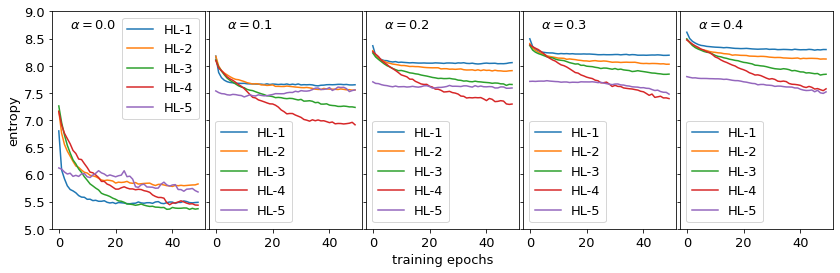

In [10]:
gs1 = gridspec.GridSpec(1, 5)
plot_index = [(0,0),(0,1),(0,2),(0,3),(0,4)]
gs1.update(wspace=0.025, hspace=0.1)

for al in range(5):
    ax = plt.subplot(gs1[plot_index[al]])
    ax.set_ylim([5, 9])
    for hl in range(5):
        ax.plot(entropy_cp[al,:,hl], label="HL-" + str(hl+1))
    if al == 2:
        ax.set_xlabel("training epochs")
    ax.legend()
    if al != 0:
        ax.set_yticklabels([])
    else:
        ax.set_ylabel("entropy")
    ax.text(4, 8.7, r"$\alpha = $" + str(alpha_list[al]))
        
#plt.savefig("Fig_en_alpha.png")
plt.show()

#### Ploting all information in entropy analysis

In [14]:
plt.rcParams["figure.figsize"] = (14,16)
plt.rcParams["font.size"] = 10
import matplotlib.gridspec as gridspec

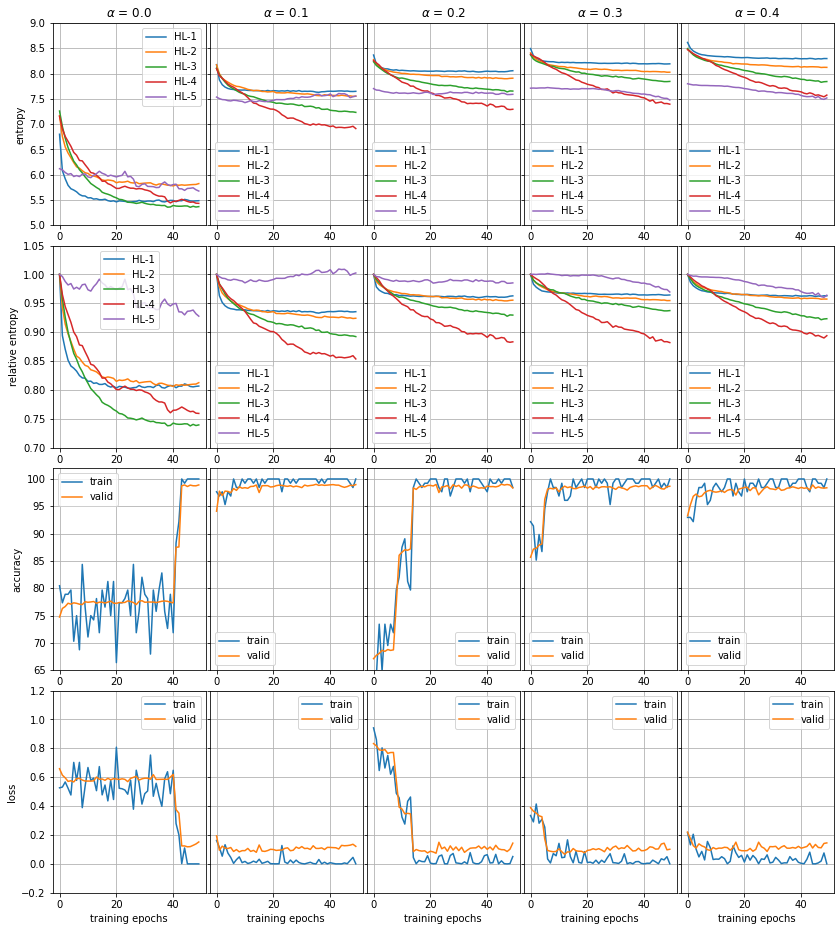

In [18]:
gs1 = gridspec.GridSpec(4, 5)
plot_index = [(0,0),(0,1),(0,2),(0,3),(0,4),
              (1,0),(1,1),(1,2),(1,3),(1,4),
              (2,0),(2,1),(2,2),(2,3),(2,4),
              (3,0),(3,1),(3,2),(3,3),(3,4)]
gs1.update(wspace=0.025, hspace=0.1)

for al in range(20):
    ax = plt.subplot(gs1[plot_index[al]])
    if al < 5:
        ax.set_ylim([5, 9])
        for hl in range(5):
            ax.plot(entropy_cp[al,:,hl], label="HL-" + str(hl+1))
        ax.set_xlabel("training epochs")
        ax.title.set_text(r"$\alpha$ = " + str(alpha_list[al]))
        ax.legend()
        ax.grid()
        if al != 0:
            ax.set_yticklabels([])
        else:
            ax.set_ylabel("entropy")
    elif al < 10:
        ax.set_ylim([0.7, 1.05])
        al=al-5
        for hl in range(5):
            ax.plot(entropy_cp[al,:,hl]/entropy_cp[al,0,hl], label="HL-" + str(hl+1))
        ax.set_xlabel("training epochs")
        ax.legend()
        ax.grid()
        if al != 0:
            ax.set_yticklabels([])
        else:
            ax.set_ylabel("relative entropy")
    elif al < 15:
        ax.set_ylim([65, 102])
        al=al-10
        ax.plot(perf_cp[al,:,0], label="train")
        ax.plot(perf_cp[al,:,2], label="valid")
        ax.set_xlabel("training epochs")
        ax.legend()
        ax.grid()
        if al != 0:
            ax.set_yticklabels([])
        else:
            ax.set_ylabel("accuracy")     
    else:
        ax.set_ylim([-0.2, 1.2])
        al=al-15
        ax.plot(perf_cp[al,:,1], label="train")
        ax.plot(perf_cp[al,:,3], label="valid")
        ax.set_xlabel("training epochs")
        ax.legend()
        ax.grid()
        if al != 0:
            ax.set_yticklabels([])
        else:
            ax.set_ylabel("loss")
                
#plt.savefig("FigA.png")
plt.show()